In [ ]:
#!/usr/bin/env python3
import geopandas as gpd
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from math import log

In [29]:
year = 2022
fname = f'../01_input_data/Other Sectors/ALLSECTORS/TNO_GHGco_v4_1_highres_year{year}_Munich_ALLSECTORS.gpkg'
dat = gpd.read_file(fname)
dat.groupby('GNFR_Sector').sum(numeric_only = True)*1e-3

,id,Year,CO2,CO,NOX,CH4,NMVOC
GNFR_Sector,,,,,,,
A,7828.917,806.778,2.587752e+06,1185.103394,2109.408460,852.641694,64.110330
B,7442.040,742.074,1.516105e+05,176.944291,69.770987,14.320488,486.507649
C,2891956.005,111539.586,3.040321e+06,3657.625883,1441.288573,309.491664,287.772318
D,4608048.000,194112.000,5.760358e+04,0.000000,0.000000,353.724388,342.078424
E,4556096.155,187684.062,4.821615e+04,318.389532,5.104281,20.117918,11921.783309
F,3111010.021,130698.036,1.414118e+06,9015.507561,3072.041146,103.198506,1003.543732
G,4554600.805,187502.082,3.133606e-11,0.000000,0.000000,0.000000,0.000000
I,4245106.511,170715.438,0.000000e+00,0.000000,213.746692,14.687579,288.227660
J,4556096.155,187702.260,0.000000e+00,25.360058,16.287003,1709.755415,39.021710


In [30]:
boarders_path = f'../01_input_data/auxiliary/munich-boarders.gpkg'
clip = gpd.read_file(boarders_path).to_crs(4326)

In [31]:
tno_clipped = dat.clip(clip)

In [32]:
def plot_inventory(df:gpd.GeoDataFrame,
                   component:'str',
                   sector:'str'='sum') -> None:

     fig, ax = plt.subplots(figsize=(10,10))
     
     if sector == 'sum': 
          plot_sum = df.groupby('id').agg({'CO2':lambda x: x.sum()* 1e-3,
                                        'CO2_bio':lambda x: x.sum()* 1e-3, 
                                        'NOX':'sum',
                                        'CO':'sum',
                                        'CH4':'sum', 
                                        'geometry': lambda x: x.iloc[0]})

          gpd.GeoDataFrame(plot_sum, geometry= 'geometry').plot(ax = ax, 
                                                                column = component, 
                                                                cmap = matplotlib.colormaps['PuBu'], 
                                                                scheme = "JenksCaspall",
                                                                vmin = 0,
                                                                k = 7,  
                                                                legend = True)
          
          # plot point sources
          max_value = df[df['GNFR_Sector']=='A'][component].max()
          df['point_size'] = 500*(df['CO2']/max_value)
          df[df['GNFR_Sector']=='A'].plot(ax = ax,
                                          markersize = 100* np.log(df[df['GNFR_Sector']=='A']['point_size']), 
                                          color = 'black')
          
          ax.set_title('Munich CO2 Emissions 2022')
          ax.get_legend().set_title("CO2 [kg/cell/year]")
          ax.set_xlabel('Latitude')
          ax.set_ylabel('Longitude')
          
     else: 
          df[df['GNFR_Sector']==sector].plot(ax = ax, 
                                             column = component, 
                                             cmap = matplotlib.colormaps['PuBu'])
     
     return None

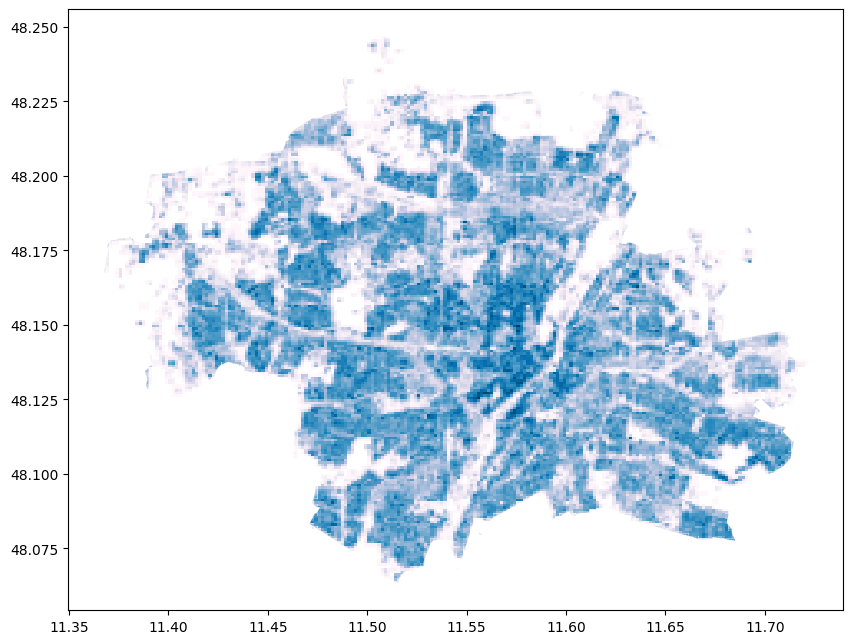

In [33]:
plot_inventory(tno_clipped, 'CO2', 'C')

In [34]:
tno_clipped.groupby('GNFR_Sector').sum(numeric_only=True) * 1e-3

,id,Year,CO2,CO,NOX,CH4,NMVOC
GNFR_Sector,,,,,,,
A,1213.274,95.034,8.112346e+05,878.625094,381.733406,778.093508,43.686280
B,1213.274,82.902,1.558099e+04,18.184533,7.170352,1.471714,454.360221
C,1307419.305,49021.368,2.086253e+06,2509.843805,989.004702,212.371566,197.467864
D,1527465.985,56039.730,4.131733e+04,0.000000,0.000000,250.608645,211.576924
E,1527465.985,56039.730,3.450833e+04,227.871592,3.653137,14.398407,8224.127054
F,1220170.811,45347.394,7.450638e+05,5224.024417,1648.025466,61.515256,594.122786
G,1527465.985,56039.730,2.242724e-11,0.000000,0.000000,0.000000,0.000000
I,1516777.856,55752.606,0.000000e+00,0.000000,123.665156,10.358802,201.897920
J,1527465.985,56043.774,0.000000e+00,5.048459,11.395940,1060.467224,14.954420


In [44]:
year = 2022

path = f'../01_input_data/GNFR C/houses_emissions_file.gpkg'

df = gpd.read_file(path, layer = f'{year}_gridded_emissions')

df.to_file(f'../01_input_data/GNFR C/GNFR_C_{year}.gpkg')